# Using `TensorFlow Datasets`

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

TensorFlow Datasets (`TFDS`) is a collection of commonly used datasets that are ready to use in machine learning models with `TensorFlow`. These datasets include both public datasets and popular research datasets used in deep learning, such as `ImageNet`, `CIFAR-10`, and `MNIST`.

This makes it easy for developers and researchers to experiment with different models and datasets without worrying about the data preprocessing steps. `TFDS` also provides a variety of features, such as data splitting, shuffling, and batching, to further simplify the data loading and processing steps. Additionally, it includes many different data formats, including image, text, audio, and video data.

![image-tfds](https://www.tensorflow.org/resources/images/kyd-screenshot_480.jpg)

[Source](https://knowyourdata.withgoogle.com/).

In this notebook, we will briefly introduce how to use `TFDS`.

All dataset builders are a subclass of `tfds.core.DatasetBuilder`. To get the list of [available builders](https://www.tensorflow.org/datasets/catalog/overview), use `tfds.list_builders()`.


In [ ]:
import tensorflow_datasets as tfds

for dataset in tfds.list_builders():
    print(dataset)

abstract_reasoning
accentdb
aeslc
aflw2k3d
ag_news_subset
ai2_arc
ai2_arc_with_ir
amazon_us_reviews
anli
answer_equivalence
arc
asqa
asset
assin2
bair_robot_pushing_small
bccd
beans
bee_dataset
beir
big_patent
bigearthnet
billsum
binarized_mnist
binary_alpha_digits
ble_wind_field
blimp
booksum
bool_q
bucc
c4
c4_wsrs
caltech101
caltech_birds2010
caltech_birds2011
cardiotox
cars196
cassava
cats_vs_dogs
celeb_a
celeb_a_hq
cfq
cherry_blossoms
chexpert
cifar10
cifar100
cifar100_n
cifar10_1
cifar10_corrupted
cifar10_n
citrus_leaves
cityscapes
civil_comments
clevr
clic
clinc_oos
cmaterdb
cnn_dailymail
coco
coco_captions
coil100
colorectal_histology
colorectal_histology_large
common_voice
conll2002
conll2003
controlled_noisy_web_labels
coqa
cos_e
cosmos_qa
covid19
covid19sum
crema_d
criteo
cs_restaurants
curated_breast_imaging_ddsm
cycle_gan
d4rl_adroit_door
d4rl_adroit_hammer
d4rl_adroit_pen
d4rl_adroit_relocate
d4rl_antmaze
d4rl_mujoco_ant
d4rl_mujoco_halfcheetah
d4rl_mujoco_hopper
d4rl_mujo

For this tutorial, we are using the `beans` dataset.

[Beans](https://github.com/AI-Lab-Makerere/ibean/) is a dataset of images of beans taken in the field using smartphone cameras. It consists of 3 classes: 2 disease classes and the healthy class. Diseases depicted include `Angular Leaf Spot` and `Bean Rust`. The data was annotated by experts from the _National Crops Resources Research Institute_ (`NaCRRI`) in Uganda and collected by the `Makerere AI research lab`.

The easiest way of loading a dataset is `tfds.load`. It will:

1. Download the data and save it as `tfrecord` files.
2. Load the `tfrecord` and create the `tf.data.Dataset`.

Here are some of the arguments we will pass through the `tfds.load`:

- `split`: Which split to read (e.g., `'train'`, `['train', 'test']`).
- `shuffle_files`: Control whether to shuffle the files between each epoch.
- `data_dir`: Location where the dataset is saved ( defaults to `~/tensorflow_datasets/`).
- `with_info`: Returns the `tfds.core.DatasetInfo` containing dataset metadata.
- `download`: Enable or disable download of the data to disk.
- `as_supervised`: Gives you a tuple of (features, label).

In [ ]:
train_ds, validation_ds, test_ds = tfds.load(
    'beans',
    split=['train', 'validation', 'test'],
    shuffle_files=True,
    as_supervised=True,
)

sample = train_ds.take(10)

print(train_ds, test_ds)

for image, label in sample:
    print(image.shape, label)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteTXN73D/beans-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteTXN73D/beans-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteTXN73D/beans-test.tfrecord*...:   0%|          | 0/1…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec=(TensorSpec(shape=(500, 500, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <_PrefetchDataset element_spec=(TensorSpec(shape=(500, 500, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(0, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(0, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(0, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(0, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(0, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(0, shape=(), dtype=int64)


`TFDT` also gives you many visualization tools to explore your dataset. One of them is `tfds.as_dataframe`. A `tf.data.Dataset` object can be converted to `pandas.DataFrame` with `tfds.as_dataframe` to be visualized. For this:

- Add the `tfds.core.DatasetInfo` as the second argument of `tfds.as_dataframe` to visualize images, audio, texts, videos, etc.
- Use `ds.take(x)` to only display the first `x` examples (`pandas.DataFrame` will load the full dataset in memory and can be very expensive to display).


,image,label
0,,1 (bean_rust)
1,,1 (bean_rust)
2,,0 (angular_leaf_spot)
3,,0 (angular_leaf_spot)
4,,1 (bean_rust)

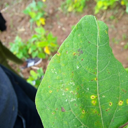
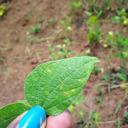
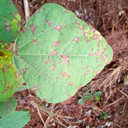
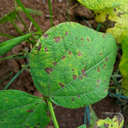
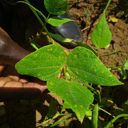

,image,label
0,,0 (angular_leaf_spot)
1,,1 (bean_rust)
2,,1 (bean_rust)
3,,1 (bean_rust)
4,,2 (healthy)

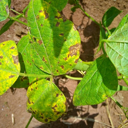
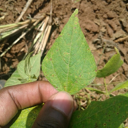
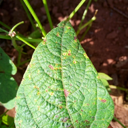
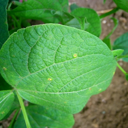
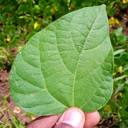

In [ ]:
from IPython.display import display
x_train, info_train = tfds.load('beans', split='train', with_info=True)
x_test, info_test = tfds.load('beans', split='test', with_info=True)


display(tfds.as_dataframe(x_train.take(5), info_train))
display(tfds.as_dataframe(x_test.take(5), info_test))


Meanwhile, `tfds.show_examples` returns a `matplotlib.figure.Figure`.


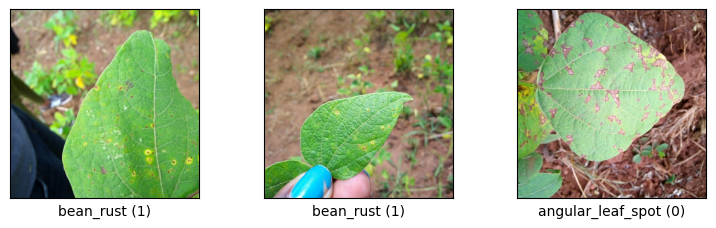

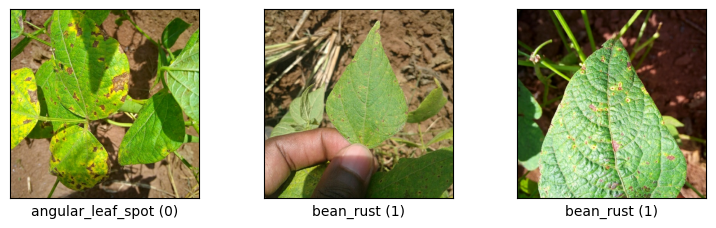

In [ ]:
fig = tfds.show_examples(x_train.take(3), info_train)
fig = tfds.show_examples(x_test.take(3), info_test)

All builders include a `tfds.core.DatasetInfo` object containing the dataset metadata. Something useful for you to get some general info about the dataset you will work on.

You can get access to this information like this:

```python

import tensorflow_datasets as tfds

builder = tfds.builder('beans')
info = builder.info

print(info)

```


In [ ]:
display(info_train)

tfds.core.DatasetInfo(
    name='beans',
    full_name='beans/0.1.0',
    description="""
    Beans is a dataset of images of beans taken in the field using smartphone
    cameras. It consists of 3 classes: 2 disease classes and the healthy class.
    Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated by
    experts from the National Crops Resources Research Institute (NaCRRI) in Uganda
    and collected by the Makerere AI research lab.
    """,
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    data_path='/root/tensorflow_datasets/beans/0.1.0',
    file_format=tfrecord,
    download_size=171.69 MiB,
    dataset_size=171.63 MiB,
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=128, num_shards=1>,
        'train': <Spli

In the metadata, you can find information like label names, image shapes, etc. You can also access information on the samples of a dataset by using the `tfds.features.FeatureDict`:

```python
import tensorflow_datasets as tfds

builder = tfds.builder('beans')

info = builder.info
info.features

```


In [ ]:
print('Number of Classes: ', info_train.features["label"].num_classes)
print('Classes Names: ',info_train.features["label"].names)
print('Third Class Name: ',info_train.features["label"].int2str(2))  # Human readable version
print('Third Class Label: ',info_train.features["label"].str2int('healthy'))

Number of Classes:  3
Classes Names:  ['angular_leaf_spot', 'bean_rust', 'healthy']
Third Class Name:  healthy
Third Class Label:  2


If you want to strip the dataset of all these extra functionalities, we can simply turn them into `numpy` arrays with the `tfds.as_numpy`. This utility converts:

- `tf.Tensor` -> `np.array`.
- `tf.data.Dataset` -> `Iterator[Tree[np.array]]`.

By using `batch_size=-1`, you can load the full dataset in a single batch.

This can be combined with `as_supervised=True` and `tfds.as_numpy` to get the full dataset as a `np.array`.


(1034, 500, 500, 3) (1034,)
(133, 500, 500, 3) (133,)
(128, 500, 500, 3) (128,)


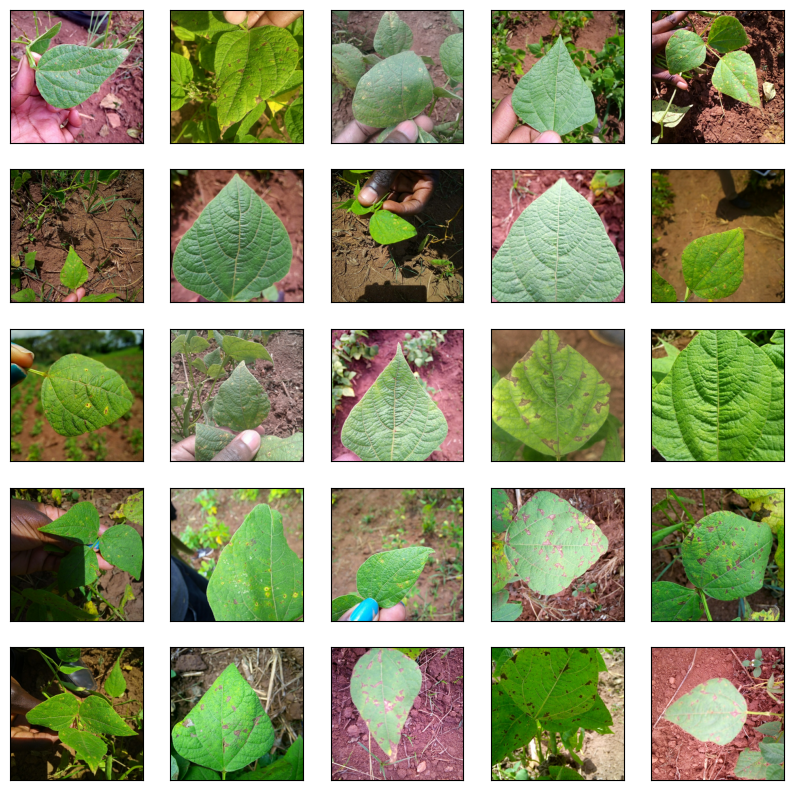

In [ ]:
import matplotlib.pyplot as plt
x_train, y_train = tfds.as_numpy(tfds.load(
    'beans',
    split='train',
    batch_size=-1,
    shuffle_files=True,
    as_supervised=True,
))

x_val, y_val = tfds.as_numpy(tfds.load(
    'beans',
    split='validation',
    batch_size=-1,
    shuffle_files=True,
    as_supervised=True,
))

x_test, y_test = tfds.as_numpy(tfds.load(
    'beans',
    split='test',
    batch_size=-1,
    shuffle_files=True,
    as_supervised=True,
))

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)


plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()


Using `this` gives you access to a multitude of datasets to practice ML. You can try to rerun some of the previous notebooks using a different dataset as an exercise to become more familiar with building your own ML experiments. 🙃

---

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).
